In [1]:
# Import Libraries 
from plantcv import plantcv as pcv
import matplotlib

In [5]:
class options:
    def __init__(self):
        self.image = "/data/2022_root_robot/trial_seedlings/Input/simple_test_color.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "/data/2022_root_robot/trial_seedlings/Output/" # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

In [3]:
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

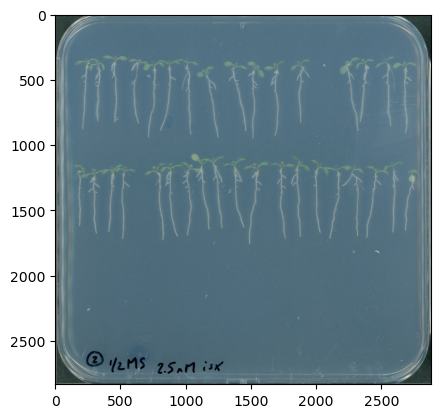

In [6]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
img, path, filename = pcv.readimage(filename=args.image)

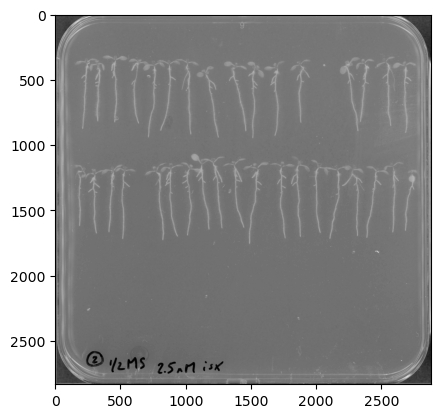

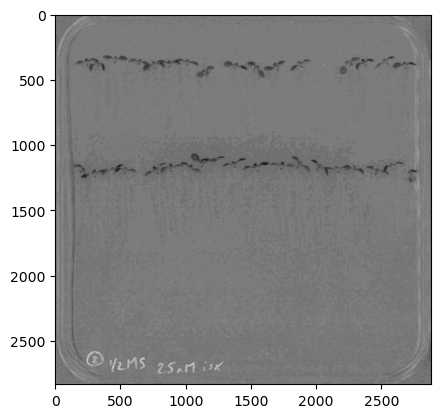

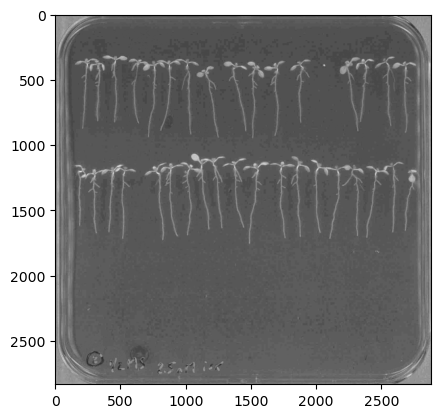

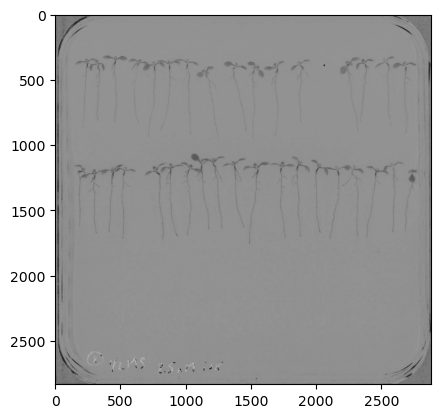

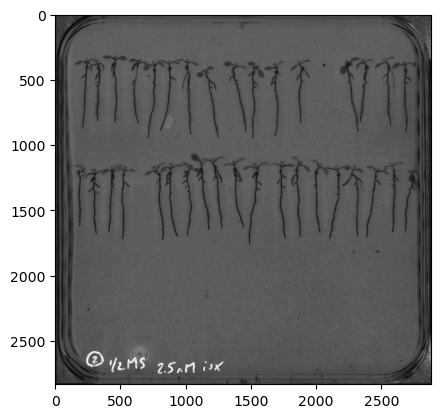

In [7]:
l = pcv.rgb2gray_lab(img, "l")
a = pcv.rgb2gray_lab(img, "a")
b = pcv.rgb2gray_lab(img, "b")
h = pcv.rgb2gray_hsv(img, "h")
s = pcv.rgb2gray_hsv(img, "s")

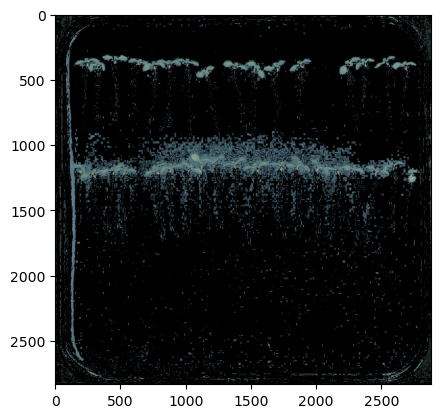

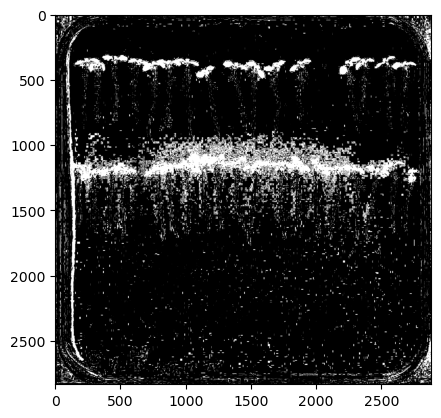

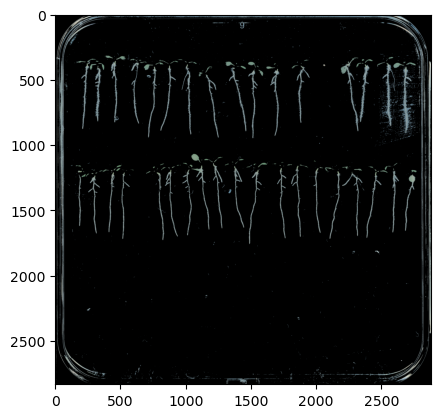

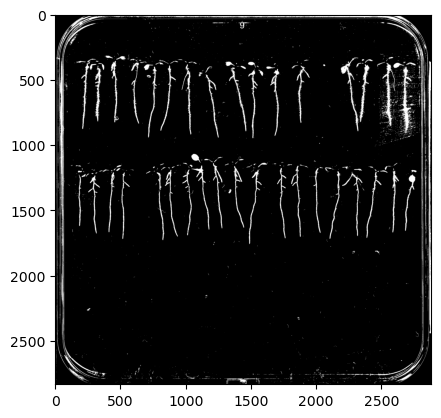

In [81]:
# mask leaves
leaves, leaves_masked = pcv.threshold.custom_range(img=img, lower_thresh=[0,0,0], upper_thresh=[255,120,255], channel='LAB')
pcv.print_image(leaves_masked, "leaves.png")

# mask whole plant
plant, plant_masked = pcv.threshold.custom_range(img=img, lower_thresh=[0,0,144], upper_thresh=[255,255,255], channel='HSV')
pcv.print_image(plant_masked, "plant.png")

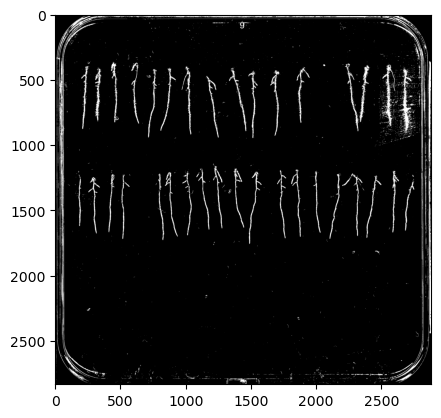

In [48]:
# subtract leaves from plant
root_raw = pcv.image_subtract(plant, leaves)

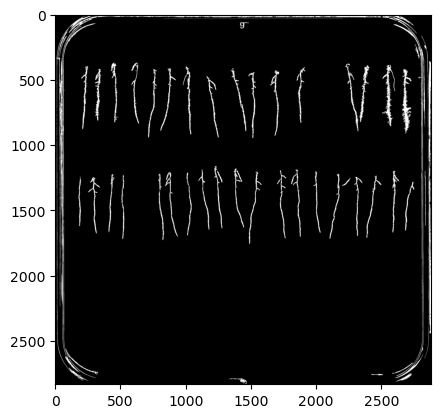

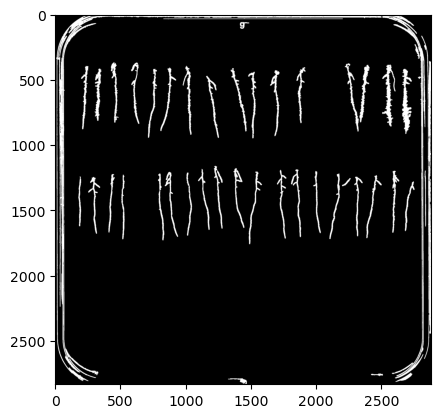

In [67]:
root_clean = pcv.fill(root_raw, 500)
root = pcv.dilate(root_clean, 4, 1)

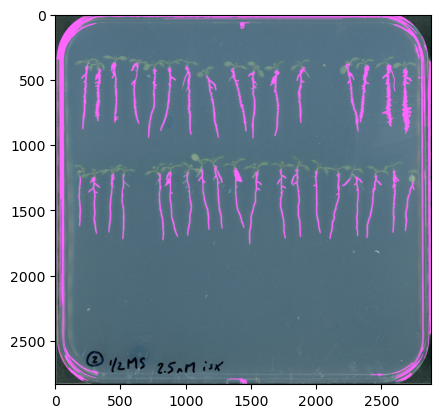

In [68]:
id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=root)

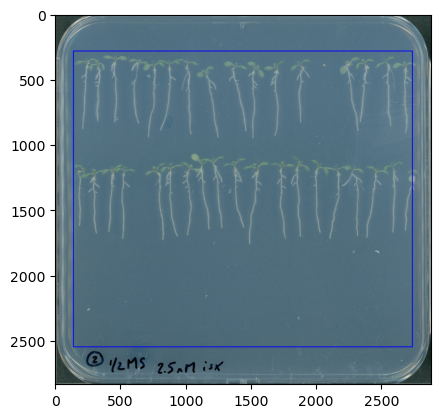

In [69]:
# Define the ROI as a rectangle relative to image size, covering 90% of the width and 80% of the height
roi_y = 0 + img.shape[0] * 0.05
roi_x = 0 + img.shape[0] * 0.1
roi_h = img.shape[0] - (img.shape[0] * 0.2)
roi_w = img.shape[1] - (img.shape[0] * 0.1)
roi_contour, roi_hierarchy = pcv.roi.rectangle(img, roi_y, roi_x, roi_h, roi_w)

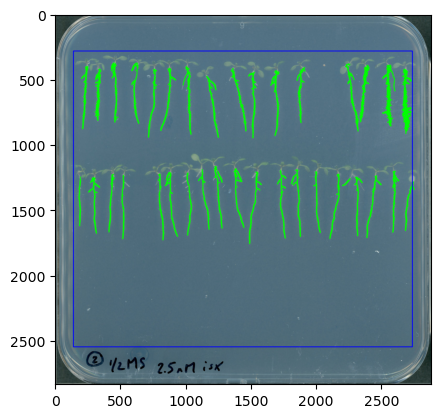

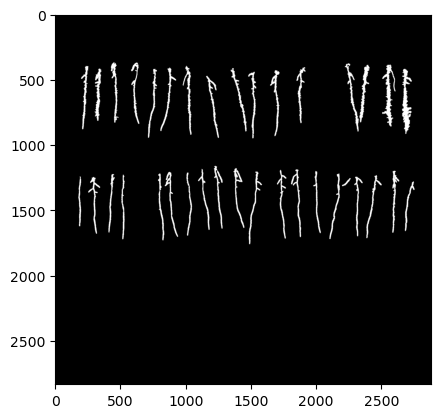

In [80]:
# cell 11
# Keep objects that overlap with the ROI
# Inputs:
#    img            = img to display kept objects
#    roi_type       = 'cutto' or 'partial' (for partially inside)
#    roi_contour    = contour of roi, output from "View and Ajust ROI" function
#    roi_hierarchy  = contour of roi, output from "View and Ajust ROI" function
#    object_contour = contours of objects, output from "Identifying Objects" fuction
#    obj_hierarchy  = hierarchy of objects, output from "Identifying Objects" fuction

roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img = img, 
                                                                      roi_type = 'partial', 
                                                                      roi_contour = roi_contour,
                                                                      roi_hierarchy = roi_hierarchy, 
                                                                      object_contour = id_objects, 
                                                                      obj_hierarchy = obj_hierarchy)
pcv.print_image(kept_mask, "mask.png")

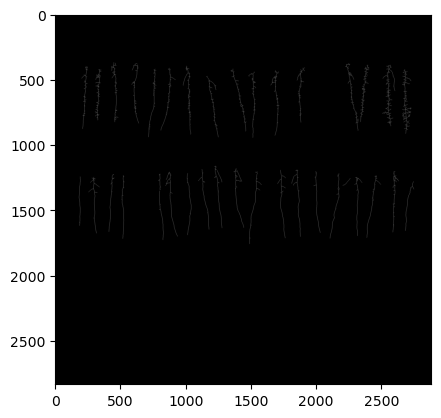

In [79]:
skeleton = pcv.morphology.skeletonize(mask=kept_mask)
pcv.print_image(skeleton, "skeleton.png")